In [1]:
import sys
sys.path.insert(0, "/Users/aron/polybox/Projects/b_significant")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

from functions.eval_functions import pval_mac

/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_13365/1399939410.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Resolution

In [2]:
n_totals = [
    1000,
    2000,
    3000,
    4000,
    5000,
    7000,
    10000,
    15000,
    20000,
    25000,
    30000,
    35000,
    40000,
    50000,
]
delta_bs = np.arange(0, 1.025, 0.025)

all_permutations = [
    i
    for i in it.product(
        n_totals,
        delta_bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_totals = all_permutations[:, 0].astype(int)
cl_delta_bs = all_permutations[:, 1]

In [3]:
n_totals = [
    1000,
    2000,
    3000,
    4000,
    5000,
    7000,
    10000,
    15000,
    20000,
    25000,
    30000,
    35000,
    40000,
    50000,
]
delta_bs = np.arange(0, 1.025, 0.025)

all_permutations = [
    i
    for i in it.product(
        n_totals,
        delta_bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_totals = all_permutations[:, 0].astype(int)
cl_delta_bs = all_permutations[:, 1]

def get_string_data(cl_idx):
    save_str = (
            "results/resolution/constant_idx/"
            "acf_mean" + str(cl_idx) + ".csv"
        )
    return save_str


def get_df():
    all_delta_bs = []
    all_n_totals = []
    all_acfs = []
    all_n_series_used = []

    for cl_idx in range(len(cl_n_totals)):
        save_str = get_string_data(cl_idx)
        try :
            acfs = np.genfromtxt('../'+save_str, delimiter=',')
        except :
            acfs = []
        try :
            n_series_used = np.genfromtxt('../'+save_str.replace("acf_mean", "n_used_mean"), delimiter=',')
        except :
            n_series_used = []

        all_delta_bs.extend([cl_delta_bs[cl_idx]]*len(acfs))
        all_n_totals.extend([cl_n_totals[cl_idx]]*len(acfs))
        all_acfs.extend(acfs)
        all_n_series_used.extend(n_series_used)

    print(all_n_totals)
    # make a dataframe
    df = pd.DataFrame({
        "acf": all_acfs,
        "delta b": all_delta_bs,
        "n_total": all_n_totals,
        "n_series_used": all_n_series_used,
    })
    return df

In [4]:
df = get_df()

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 100

In [5]:
# add a new collum to the dataframe

df["p_val"] = pval_mac(np.array(df["acf"]), np.array(df["n_series_used"]),cutting="constant_idx")

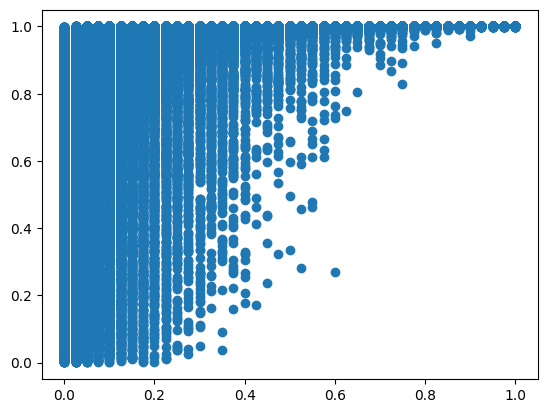

In [6]:
plt.scatter(df['delta b'], 1-df['p_val'])

In [7]:
# make contour plot od p-values

# make a grid of the parameters
delta_bs = np.unique(df['delta b'])
n_totals = np.unique(df['n_total'])

# for each parameter, get the quantiles of the p-values
p_val_grid = np.zeros((len(delta_bs), len(n_totals)))
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        p_val_grid[ii, jj] = np.quantile(1-df[(df['delta b'] == delta_b) & (df['n_total'] == n_total)]['p_val'], 0.05)


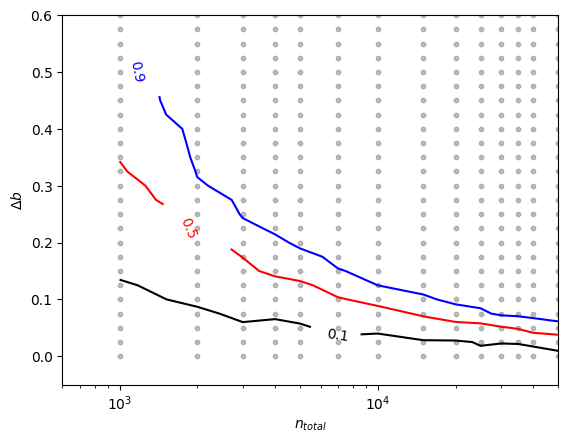

In [8]:
# plot the contour plot
plt.figure()
Contourrange = [0.1,0.5,0.9]
CS = plt.contour(n_totals, delta_bs, p_val_grid, levels=Contourrange, colors=['k','r','b'])
plt.clabel(CS, fontsize=10, inline=1)


# plot grid points
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        plt.scatter(n_total, delta_b, color='grey', alpha=0.5, s=10)
plt.ylim(-0.05, 0.6)
plt.xlim(600, 50000)

plt.xlabel('$n_{total}$')
plt.ylabel('$\Delta b$')

# log x axis
plt.xscale('log')

# Lengthscale

In [1]:
import sys
sys.path.insert(0, "/Users/aron/polybox/Projects/b_significant")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd
# import argrelextrema
from scipy.signal import argrelextrema

from functions.eval_functions import mu_sigma_mac, zval_mac

/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_13566/3676188136.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
mc = 0
delta_m = 0.1
b = 1
b_parameter = "b_value"
cutting = "constant_idx"
transform = False
n_total = 80000

def lengthscale_deltabs(shape):
    if shape == 'gauss':
        delta_bs = np.arange(0.02, 0.22, 0.02)
        length_scales = np.arange(100, 2000, 150)
    elif shape == 'sinus':
        delta_bs = np.arange(0.02, 0.22, 0.02)
        length_scales = np.arange(200, 4000, 300)
    elif shape == 'rectangle':
        delta_bs = np.arange(0.1, 1.1, 0.1)
        length_scales = np.arange(150, 3000, 150)
    else:
        raise ValueError('shape not recognized')
    all_permutations = [
            i
            for i in it.product(
                delta_bs,
                length_scales,
            )
        ]
    all_permutations = np.array(all_permutations)
    # parameter vectors to run through with cl_idx
    cl_delta_bs = all_permutations[:, 0]
    cl_length_scales = all_permutations[:, 1].astype(int)
    return length_scales, delta_bs, cl_length_scales, cl_delta_bs,

def get_string_data(cl_idx, shape):
    if shape == 'gauss':
        save_str = (
                "results/length_scale/constant_idx/"
                "df_"+ shape + str(cl_idx) + ".csv"
            )
    elif shape == 'sinus':
        save_str = (
                "results/length_scale/constant_idx/"
                "df_" + shape + str(cl_idx) + ".csv"
            )
    elif shape == 'rectangle':
        save_str = (
                "results/length_scale/constant_idx/"
                "df_" + shape + str(cl_idx) + ".csv"
            )
    else:
        raise ValueError('shape not recognized')
    return save_str

def get_df(shape):
    df = pd.DataFrame()
    _, _, cl_length_scales, cl_delta_bs, = lengthscale_deltabs(shape)

    for cl_idx in range(len(cl_delta_bs)):
        save_str = get_string_data(cl_idx, shape)
        df_loop = pd.read_csv('../'+save_str, sep=',')
        df_loop['delta b'] = cl_delta_bs[cl_idx]
        df_loop['length scale'] = cl_length_scales[cl_idx]
        # add to df
        df = pd.concat([df, df_loop], ignore_index=True)
    return df

def get_eval_df(shape):
    df = get_df(shape)
    length_scales, delta_bs, _, _ = lengthscale_deltabs(shape)

    max_ig_here = []
    max_ig_next = []
    max_ig_next1 = []
    n_max_ig_here = []
    n_max_ig_next = []
    n_max_ig_next1 = []
    n_max_acf = []
    max_acf = []
    delta_b_all = []
    length_scale_all = []
    sim_number_all = []
    inv_ig_here = []
    inv_ig_next = []
    inv_ig_next1 = []
    
    for delta_b in delta_bs:
        for length_scale in length_scales:
            for sim_num in np.arange(10):
                df_loop = df[(df['delta b'] == delta_b) & (df['length scale'] == length_scale) & (df['sim_number'] == sim_num)]
                ig_here = df_loop['ig_here'].values
                ig_next = df_loop['ig_next'].values
                ig_next1 = df_loop['ig_next1'].values
                n_b = df_loop['n_b'].values
                acf = df_loop['acf'].values
                z_val = zval_mac(acf,n_total/n_b,cutting=cutting) 
                n_max_ig_here.append(n_b[np.argmax(ig_here)])
                max_ig_here.append(np.max(ig_here))
                n_max_ig_next.append(n_b[np.argmax(ig_next)])
                max_ig_next.append(max(ig_next))
                n_max_ig_next1.append(n_b[np.argmax(ig_next1)])
                max_ig_next1.append(max(ig_next1))
                n_max_acf.append(n_b[np.argmax(acf)])
                inv_ig_here.append(ig_here[np.argmax(acf)])
                inv_ig_next.append(ig_next[np.argmax(acf)])
                inv_ig_next1.append(ig_next1[np.argmax(acf)])
                max_acf.append(np.max(acf))
                n_max_zval = n_b[np.argmax(z_val)]
                max_zval = np.max(z_val)
                delta_b_all.append(delta_b)
                length_scale_all.append(length_scale)
                sim_number_all.append(sim_num)
    
    # estimate the z-score
    n_max_acf=np.array(n_max_acf)
    z_val = zval_mac(max_acf,n_total/n_max_acf,cutting=cutting) 

    # make dataframe of the results
    df_eval = pd.DataFrame({'n_max_ig_here': n_max_ig_here,
                        'max_ig_here': max_ig_here,
                        'n_max_ig_next': n_max_ig_next,
                        'max_ig_next': max_ig_next,
                        'n_max_ig_next1': n_max_ig_next1,
                        'max_ig_next1': max_ig_next1,
                        'n_max_acf': n_max_acf,
                        'inv_ig_here': inv_ig_here,
                        'inv_ig_next': inv_ig_next,
                        'inv_ig_next1': inv_ig_next1,
                        'max_acf': max_acf,
                        'n_max_zval': n_max_zval,
                        'max_zval': max_zval,
                        'delta b': delta_b_all,
                        'length scale': length_scale_all,
                        'sim number': sim_number_all,
                        'z_val': z_val})
    return df_eval

In [3]:
df_eval_gauss = get_eval_df('gauss')
df_eval_sinus = get_eval_df('sinus')
df_eval_rectangle = get_eval_df('rectangle')

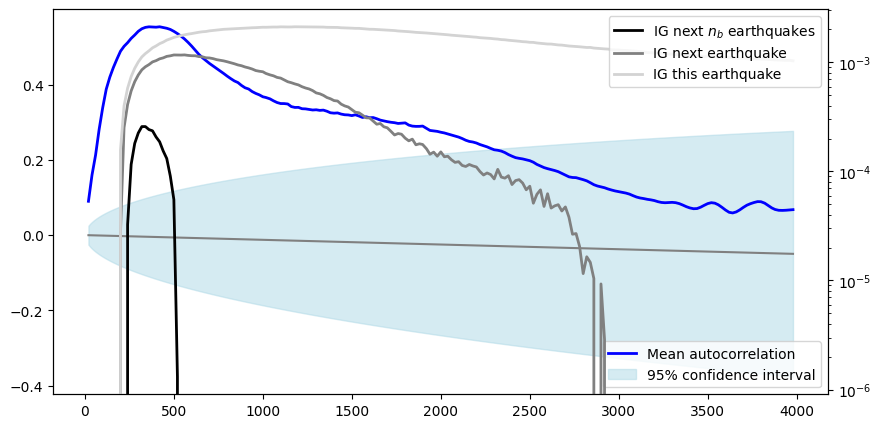

In [4]:
# round delta_b
df = get_df('gauss')
df['delta b'] = np.round(df['delta b'], 2)

idx1 = df['sim_number'].values == 5
idx2 = df['length scale'].values == 1000
idx3 = df['delta b'].values == 0.08
df_loop = df[idx1 & idx2 & idx3]

n_b = df_loop['n_b'].values
acf = df_loop['acf'].values
ig_next = df_loop['ig_next'].values
ig_next1 = df_loop['ig_next1'].values
ig_here = df_loop['ig_here'].values

ax1 = plt.subplots(figsize=(10, 5))[1]
ax1.plot(n_b, acf, color='blue', linewidth=2, label='Mean autocorrelation')
# Plot 0.05 threshold
x = np.arange(n_total/max(n_b), n_total/min(n_b) + 1, 1)
mu, sigma = mu_sigma_mac(x, cutting)
ax1.plot(n_total / x, mu, color="grey", linestyle="-")
ax1.fill_between(
    n_total / x,
    1.96 * sigma - 1 / x,
    -1.96 * sigma - 1 / x,
    color="lightblue",
    alpha=0.5,
    label="95% confidence interval",
)

# twin ax
ax2 = plt.gca().twinx()
plt.yscale('log')
ax2.plot(n_b, ig_next, color='black', linewidth=2, label='IG next $n_b$ earthquakes')
ax2.plot(n_b, ig_next1, color='grey', linewidth=2, label='IG next earthquake')
ax2.plot(n_b, ig_here, color='lightgrey', linewidth=2, label='IG this earthquake')

# legened
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

0.8489658489658489


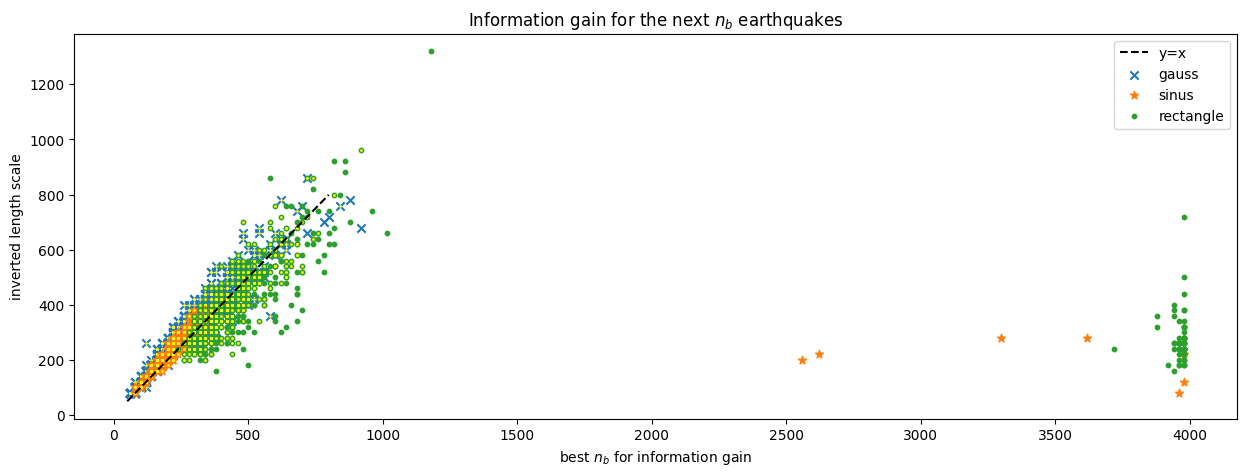

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ig_str = 'ig_next'
threshold = 0.5

x1 = np.arange(50,800)
ax.plot(x1,x1, label='y=x', color='black', linestyle='--')

df_filter = df_eval_gauss[(df_eval_gauss['max_acf'] > threshold)]
total = len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='x', label= 'gauss')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos = len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1, color='yellow')

df_filter = df_eval_sinus[(df_eval_sinus['max_acf'] > threshold)]
total += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'],  marker='*', label= 'sinus')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1, color='yellow')

df_filter = df_eval_rectangle[(df_eval_rectangle['max_acf'] > threshold)]
total += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=10 ,label= 'rectangle')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1 , color='yellow')

ax.set_xlabel('best $n_b$ for information gain')
ax.set_ylabel('inverted length scale')
ax.legend()

# set the title
ax.set_title('Information gain for the next $n_b$ earthquakes')

# share of all positive IG vs negative
share_pos = pos/total
print(share_pos)

0.9211779991338241


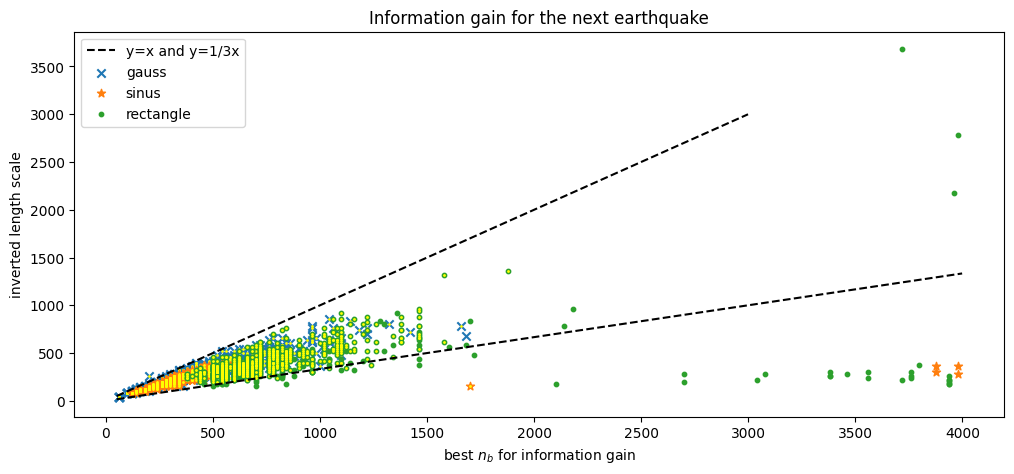

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ig_str = 'ig_next1'
threshold = 0.45

x1 = np.arange(50,4000)
x2 = np.arange(50,3000)
ax.plot(x1,x1/3, label='y=x and y=1/3x', color='black', linestyle='--')
ax.plot(x2,x2, color='black', linestyle='--')


df_filter = df_eval_gauss[(df_eval_gauss['max_acf'] > threshold)]
total = len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='x', label= 'gauss')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos = len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1, color='yellow')

df_filter = df_eval_sinus[(df_eval_sinus['max_acf'] > threshold)]
total += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'],  marker='*', label= 'sinus')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1, color='yellow')

df_filter = df_eval_rectangle[(df_eval_rectangle['max_acf'] > threshold)]
total += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=10 ,label= 'rectangle')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1 , color='yellow')

ax.set_xlabel('best $n_b$ for information gain')
ax.set_ylabel('inverted length scale')
ax.legend()

# set the title
ax.set_title('Information gain for the next earthquake')

# share of all positive IG vs negative
share_pos = pos/total
print(share_pos)


0.915201250488472


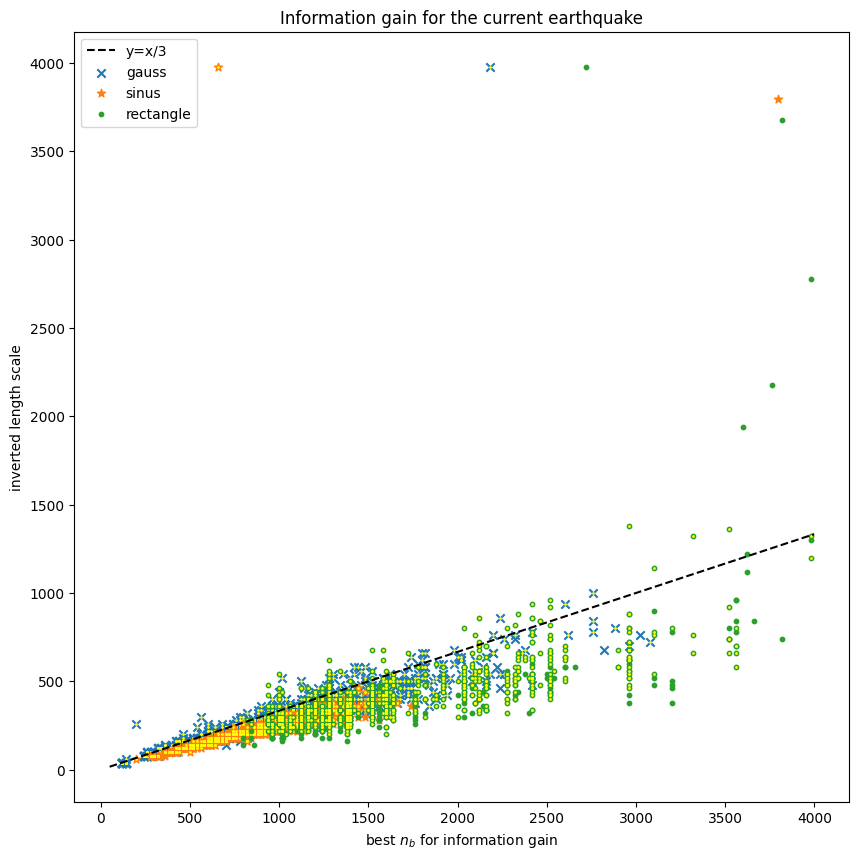

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ig_str = 'ig_here'
threshold = 0.4

x1 = np.arange(50,4000)
ax.plot(x1,x1/3, label='y=x/3', color='black', linestyle='--')

df_filter = df_eval_gauss[(df_eval_gauss['max_acf'] > threshold)]
total = len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='x', label= 'gauss')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos = len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1, color='yellow')

df_filter = df_eval_sinus[(df_eval_sinus['max_acf'] > threshold)]
total += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'],  marker='*', label= 'sinus')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1, color='yellow')

df_filter = df_eval_rectangle[(df_eval_rectangle['max_acf'] > threshold)]
total += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=10 ,label= 'rectangle')
df_filter = df_filter[(df_filter['inv_'+ig_str] > 0)]
pos += len(df_filter)
ax.scatter(df_filter['n_max_'+ig_str], df_filter['n_max_acf'], marker='o', s=1 , color='yellow')

ax.set_xlabel('best $n_b$ for information gain')
ax.set_ylabel('inverted length scale')
ax.legend()


# set the title
ax.set_title('Information gain for the current earthquake')

# share of all positive IG vs negative
share_pos = pos/total
print(share_pos)

Text(0.5, 1.0, 'True vs. inverted length scale')

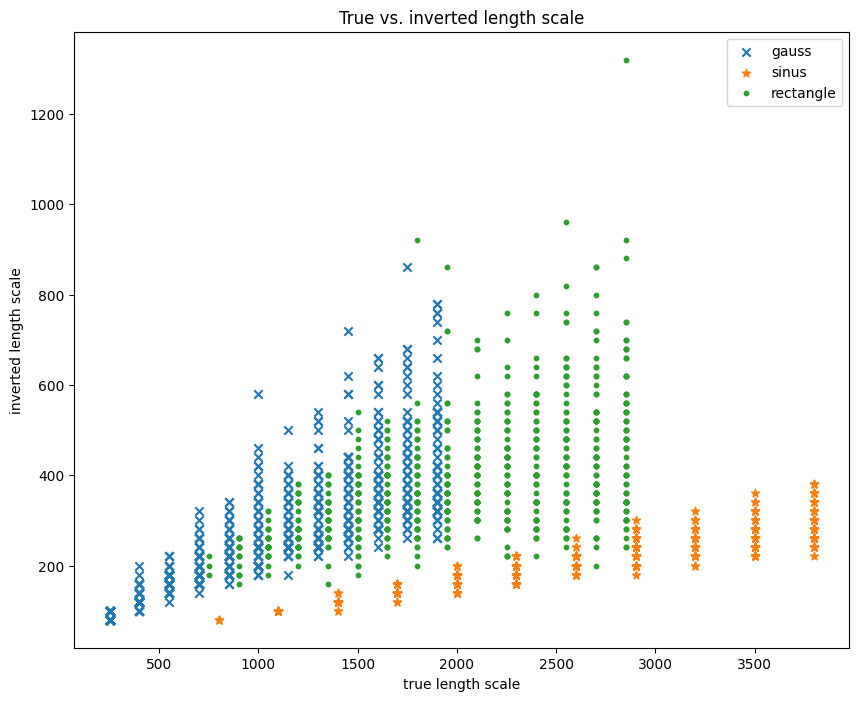

In [43]:
ax = plt.subplots(1, 1, figsize=(10, 8))[1]
threshold = 0.5


df_filter = df_eval_gauss[(df_eval_gauss['max_acf'] > threshold)]
ax.scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='x', label= 'gauss')

df_filter = df_eval_sinus[(df_eval_sinus['max_acf'] > threshold)]
ax.scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='*', label= 'sinus')

df_filter = df_eval_rectangle[(df_eval_rectangle['max_acf'] > threshold)]
ax.scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='o', s=10 ,label= 'rectangle')

ax.set_xlabel('true length scale')
ax.set_ylabel('inverted length scale')
ax.legend()

# set the title
ax.set_title('True vs. inverted length scale')

In [ ]:
ax = plt.subplots(1, 1, figsize=(10, 8))[1]
threshold = 2


df_filter = df_eval_gauss[(df_eval_gauss['max_acf'] > threshold)]
ax.scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='x', label= 'gauss')

df_filter = df_eval_sinus[(df_eval_sinus['max_acf'] > threshold)]
ax.scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='*', label= 'sinus')

df_filter = df_eval_rectangle[(df_eval_rectangle['max_acf'] > threshold)]
ax.scatter(df_filter['length scale'], df_filter['n_max_acf'], marker='o', s=10 ,label= 'rectangle')

ax.set_xlabel('true length scale')
ax.set_ylabel('inverted length scale')
ax.legend()

# set the title
ax.set_title('True vs. inverted length scale')

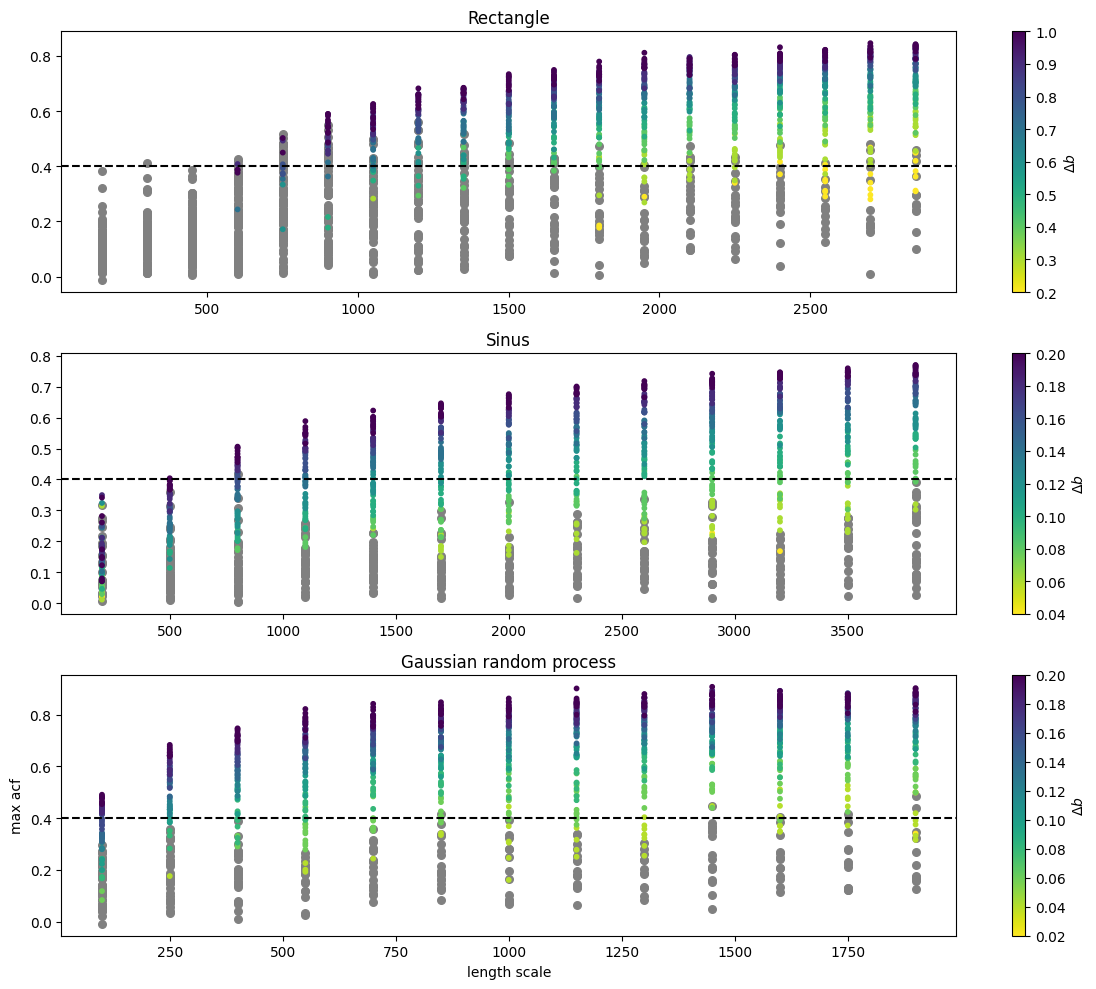

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
ig_str = 'ig_next1'
if ig_str == 'ig_here':
    threshold = 0.3
elif ig_str == 'ig_next1':
    threshold = 0.4
elif ig_str == 'ig_next':
    threshold = 0.5
variable = 'max_acf'

df_chosen = df_eval_rectangle
df_filter = df_chosen[(df_chosen['max_'+ig_str] < 0)]
ax[0].scatter(df_filter['length scale'], df_filter[variable], c='grey', s=30)
df_filter = df_chosen[(df_chosen['max_'+ig_str] > 0)]
#plt.plot(df_filter['z_val'])
#plt.plot(df_filter['length scale'], df_filter['max_acf'], 'o')
cs = ax[0].scatter(df_filter['length scale'], df_filter[variable], c=df_filter['delta b'], s=10, cmap='viridis_r')
cbar = plt.colorbar(cs)
cbar.set_label('$\Delta b$')
ax[0].axhline(threshold, color='black', linestyle='--')
ax[0].set_title('Rectangle')

df_chosen = df_eval_sinus
df_filter = df_chosen[(df_chosen['max_'+ig_str] < 0)]
ax[1].scatter(df_filter['length scale'], df_filter[variable], c='grey', s=30)
df_filter = df_chosen[(df_chosen['max_'+ig_str] > 0)]
#plt.plot(df_filter['z_val'])
#plt.plot(df_filter['length scale'], df_filter['max_acf'], 'o')
cs = ax[1].scatter(df_filter['length scale'], df_filter[variable], c=df_filter['delta b'], s=10, cmap='viridis_r')
cbar = plt.colorbar(cs)
cbar.set_label('$\Delta b$')
ax[1].axhline(threshold, color='black', linestyle='--')
ax[1].set_title('Sinus')

df_chosen = df_eval_gauss
df_filter = df_chosen[(df_chosen['max_'+ig_str] < 0)]
ax[2].scatter(df_filter['length scale'], df_filter[variable], c='grey', s=30)
df_filter = df_chosen[(df_chosen['max_'+ig_str] > 0)]
#plt.plot(df_filter['z_val'])
#plt.plot(df_filter['length scale'], df_filter['max_acf'], 'o')
cs = ax[2].scatter(df_filter['length scale'], df_filter[variable], c=df_filter['delta b'], s=10, cmap='viridis_r')
cbar = plt.colorbar(cs)
cbar.set_label('$\Delta b$')
ax[2].axhline(threshold, color='black', linestyle='--')
ax[2].set_title('Gaussian random process')

# add labels
plt.xlabel('length scale')
plt.ylabel('max acf')

fig.tight_layout()

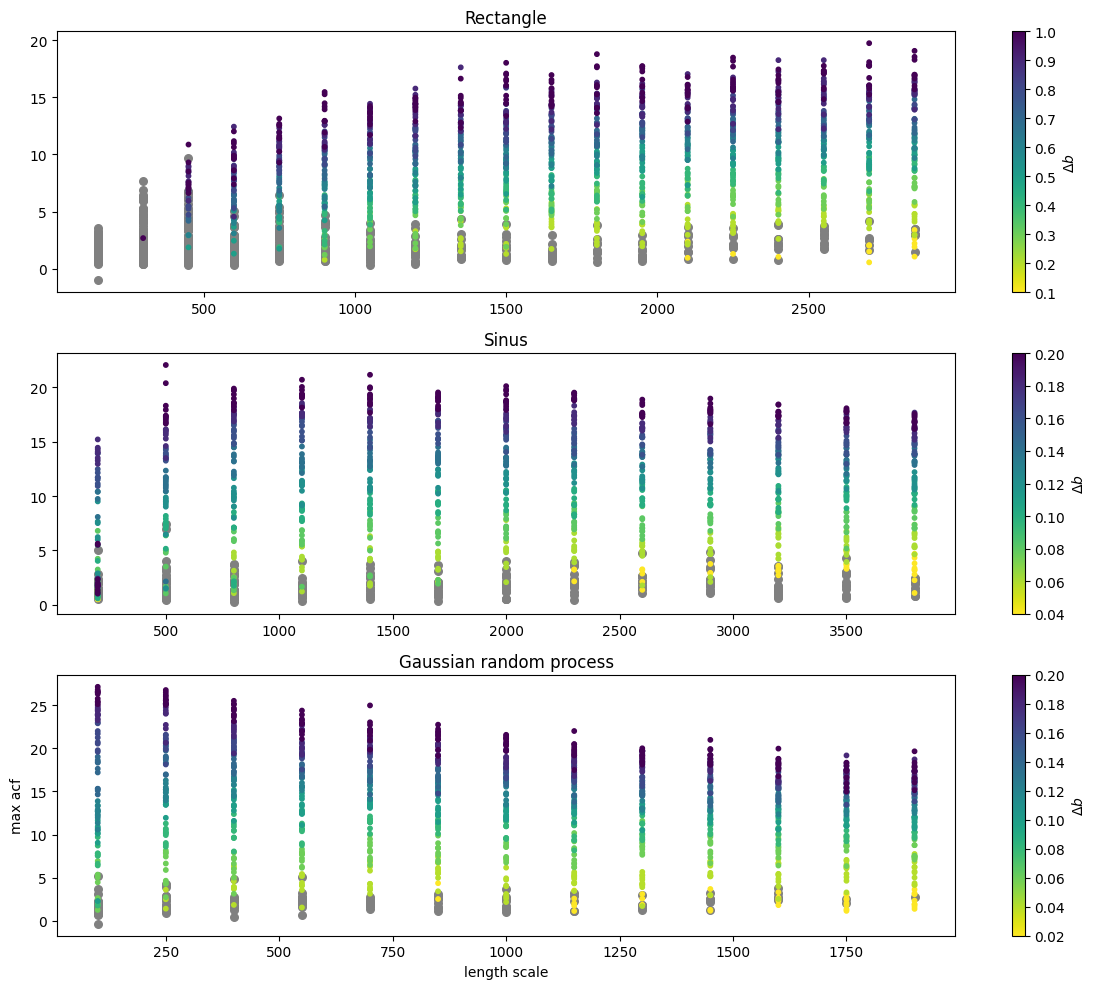

In [34]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
ig_str = 'ig_here'
variable = 'z_val'

df_chosen = df_eval_rectangle
df_filter = df_chosen[(df_chosen['max_'+ig_str] < 0)]
ax[0].scatter(df_filter['length scale'], df_filter[variable], c='grey', s=30)
df_filter = df_chosen[(df_chosen['max_'+ig_str] > 0)]
#plt.plot(df_filter['z_val'])
#plt.plot(df_filter['length scale'], df_filter['max_acf'], 'o')
cs = ax[0].scatter(df_filter['length scale'], df_filter[variable], c=df_filter['delta b'], s=10, cmap='viridis_r')
cbar = plt.colorbar(cs)
cbar.set_label('$\Delta b$')
ax[0].set_title('Rectangle')

df_chosen = df_eval_sinus
df_filter = df_chosen[(df_chosen['max_'+ig_str] < 0)]
ax[1].scatter(df_filter['length scale'], df_filter[variable], c='grey', s=30)
df_filter = df_chosen[(df_chosen['max_'+ig_str] > 0)]
#plt.plot(df_filter['z_val'])
#plt.plot(df_filter['length scale'], df_filter['max_acf'], 'o')
cs = ax[1].scatter(df_filter['length scale'], df_filter[variable], c=df_filter['delta b'], s=10, cmap='viridis_r')
cbar = plt.colorbar(cs)
cbar.set_label('$\Delta b$')
ax[1].set_title('Sinus')

df_chosen = df_eval_gauss
df_filter = df_chosen[(df_chosen['max_'+ig_str] < 0)]
ax[2].scatter(df_filter['length scale'], df_filter[variable], c='grey', s=30)
df_filter = df_chosen[(df_chosen['max_'+ig_str] > 0)]
#plt.plot(df_filter['z_val'])
#plt.plot(df_filter['length scale'], df_filter['max_acf'], 'o')
cs = ax[2].scatter(df_filter['length scale'], df_filter[variable], c=df_filter['delta b'], s=10, cmap='viridis_r')
cbar = plt.colorbar(cs)
cbar.set_label('$\Delta b$')
ax[2].set_title('Gaussian random process')

# add labels
plt.xlabel('length scale')
plt.ylabel('max acf')

fig.tight_layout()